In [1]:
import pandas as pd
import numpy as np

from sklearn import feature_selection, pipeline, ensemble, model_selection, metrics

import datamol as dm

from rdkit.Chem.Crippen import MolLogP

## чтение + формирование X

### Ulrich

In [2]:
df_train = pd.read_excel(
    "Dataset_and_Predictions.xlsx", sheet_name="model"
).drop_duplicates(subset="ChemID")
y_train = df_train.iloc[:, 3]

df_train

,SMILES,CAS,ChemID,logP\nexperimental\n(corrected),assignment\nDNNtaut,logP\npredicted\nDNNtaut,assignment\nDNNmono,logP\npredicted\nDNNmono,canonical \nSMILES
0,[H]C([H])=O,50-00-0,100001,0.350,training,0.346249,none,none,No
2,[H]OC([H])([H])C(=O)C1(O[H])C([H])(C([H])([H])...,50-02-2|378-44-9,100002,1.885,training,1.992925,none,none,No
29,[H]OC(=C([H])OC(=O)C([H])([H])[H])C1(O[H])C([H...,50-03-3,100003,2.190,training,2.110708,none,none,No
58,CC(=O)OCC(=O)C1(O)CCC2C3CC=C4C=C(O)CCC4(C)C3C(...,50-04-4,100004,2.100,validation,2.192864,none,none,No
109,[H]N1C(=O)N([H])C(=O)C(C1=O)(C1=C([H])C([H])=C...,50-06-6,100005,1.470,training,1.680934,none,none,No
...,...,...,...,...,...,...,...,...,...
111125,BrC1=CC=C(OC2=C(Br)C=C(Br)C=C2Br)C(Br)=C1,189084-64-8,160005,7.240,training,7.382467,none,none,No
111127,BrC1=CC(Br)=C(OC2=CC(Br)=C(Br)C=C2Br)C=C1Br,68631-49-2,160006,7.900,training,7.708635,none,none,No
111130,BrC1=CC(Br)=C(OC2=CC(Br)=C(Br)C=C2Br)C(Br)=C1,207122-15-4,160007,7.820,training,7.968630,none,none,No
111132,BrC1=CC(Br)=C(OC2=C(Br)C=C(Br)C(Br)=C2Br)C=C1Br,207122-16-5,160008,8.270,training,8.209812,none,none,No


In [3]:
smiles_Ulrich = df_train.SMILES

mols_Ulrich = [dm.to_mol(smiles) for smiles in smiles_Ulrich]

fps_Ulrich = [
    dm.to_fp(mol, fp_type="ecfp-count", nBits=1024 * 4) for mol in mols_Ulrich
]

X_train = pd.DataFrame(data=np.array(fps_Ulrich))  # сделаем не только с 0 и 1
X_train

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Martel

In [4]:
df_test = pd.read_csv("/data/datasets/martel.tsv", sep="\t")

y_test = df_test.LogP

In [5]:
smiles_Martel = df_test.Smiles

mols_Martel = [dm.to_mol(smiles) for smiles in smiles_Martel]

fps_Martel = [
    dm.to_fp(mol, fp_type="ecfp-count", nBits=1024 * 4) for mol in mols_Martel
]

X_test = pd.DataFrame(data=np.array(fps_Martel))
X_test

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### из статьи

In [6]:
MAIN_MOLS = pd.read_csv(
    "MOLS.csv"
)  # работает только на ядре 3.12.1, которе не стоит в рекомендованном
smiles = MAIN_MOLS.SMILES
names = list(MAIN_MOLS.NAME)
names

['Lycorine',
 'Apiol',
 'Dillapiol',
 'ATMB',
 'Myristicin',
 'TPP–apiol',
 'TPP–dillapiol',
 'TPP–ATMB',
 'Propyl–TPP',
 'Allylbenzene',
 'Estragole',
 'Eugenol',
 '1-allyl-1.2.4-triazol',
 '2.5-dimethoxy-3.4-methylenedioxy-4′-methoxychalcon',
 '2.5-dimethoxy-3.4-methylenedioxy-4′.5′-methylenedioxychalcon',
 '2.5-dimethoxy-3.4-methylenedioxy-4′-fluorochalcon']

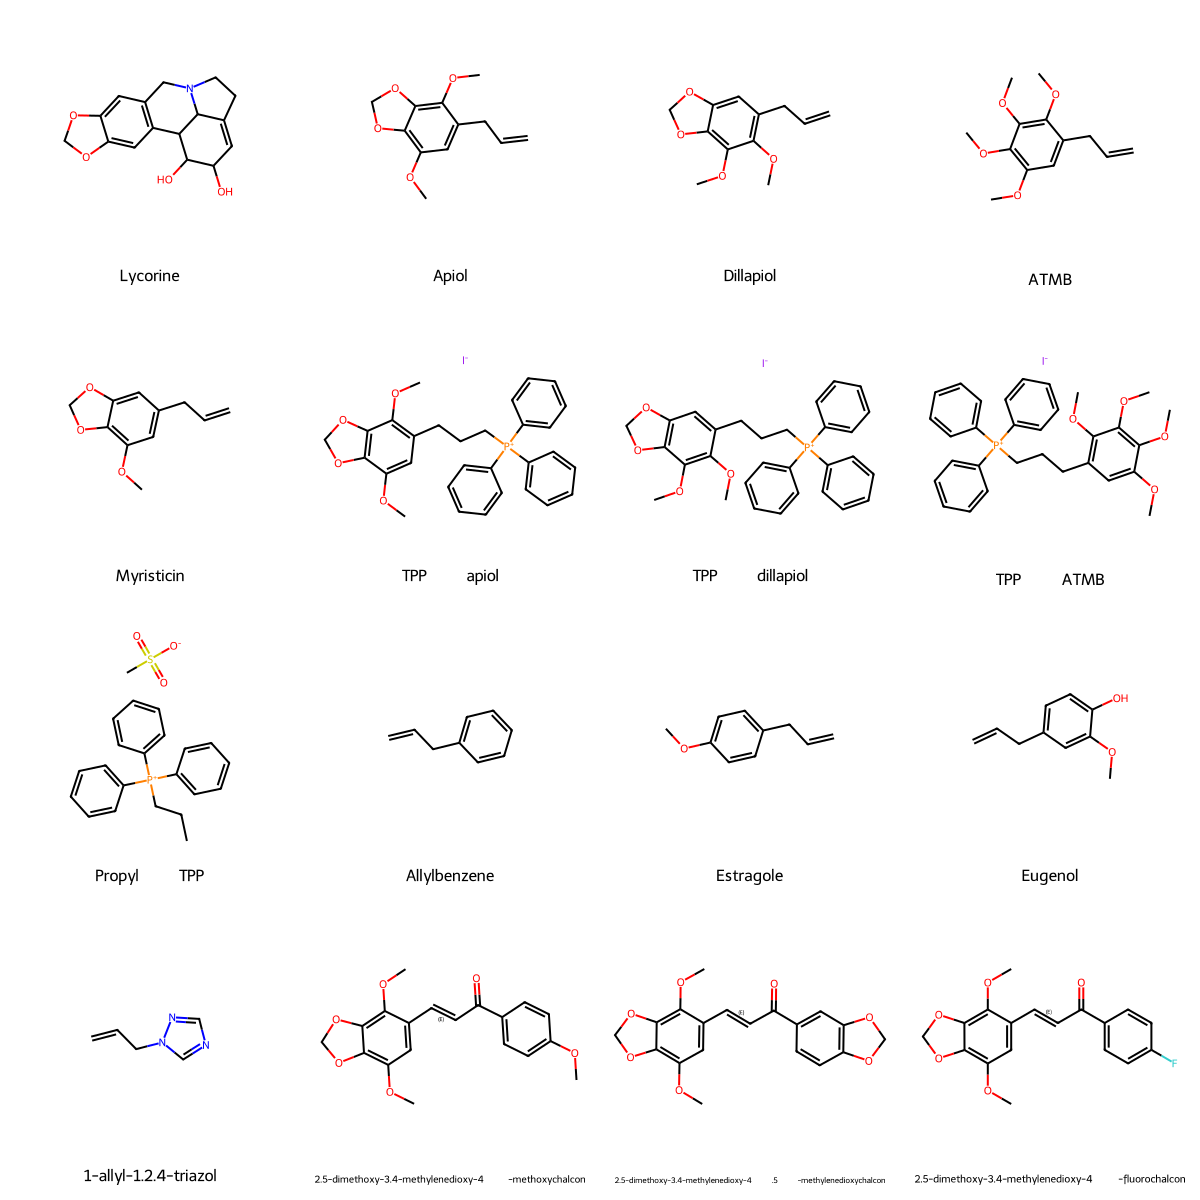

In [7]:
mols = [dm.to_mol(smiles) for smiles in smiles]
dm.to_image(mols=mols, legends=names)

In [8]:
fps_16 = [dm.to_fp(mol, fp_type="ecfp-count", nBits=1024 * 4) for mol in mols]

X_test_fps_16 = pd.DataFrame(data=np.array(fps_16))
X_test_fps_16

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Params tuning

In [9]:
kf = model_selection.RepeatedKFold(
    n_splits=5,
    n_repeats=1,
    random_state=42,
)

In [10]:
rf_wide = ensemble.RandomForestRegressor(
    max_features="sqrt",
    n_estimators=2000,
    n_jobs=-1,
    random_state=42,
    min_samples_leaf=1,
    min_samples_split=2,
)

In [23]:
wide_grid = {
    "max_depth": np.linspace(300, 600, 4, dtype="int"),
}

In [25]:
gs_wide = model_selection.GridSearchCV(
    rf_wide,
    wide_grid,
    verbose=3,
    n_jobs=1,
    cv=kf,
)

In [26]:
gs_wide.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................max_depth=300;, score=0.834 total time=  16.3s
[CV 2/5] END .....................max_depth=300;, score=0.817 total time=  16.3s
[CV 3/5] END .....................max_depth=300;, score=0.828 total time=  16.3s
[CV 4/5] END .....................max_depth=300;, score=0.815 total time=  16.6s
[CV 5/5] END .....................max_depth=300;, score=0.822 total time=  16.5s
[CV 1/5] END .....................max_depth=400;, score=0.834 total time=  16.4s
[CV 2/5] END .....................max_depth=400;, score=0.817 total time=  16.5s
[CV 3/5] END .....................max_depth=400;, score=0.828 total time=  16.4s
[CV 4/5] END .....................max_depth=400;, score=0.815 total time=  16.5s
[CV 5/5] END .....................max_depth=400;, score=0.822 total time=  16.6s
[CV 1/5] END .....................max_depth=500;, score=0.834 total time=  16.3s
[CV 2/5] END .....................max_depth=500;,

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=42),
             estimator=RandomForestRegressor(max_features='sqrt',
                                             n_estimators=1500, n_jobs=-1,
                                             random_state=42),
             n_jobs=1, param_grid={'max_depth': array([300, 400, 500, 600])},
             verbose=3)

In [27]:
gs_wide.best_score_, gs_wide.best_params_

(0.8233255080787047, {'max_depth': 300})

## обучение

In [28]:
rf_model = ensemble.RandomForestRegressor(
    max_features="sqrt",
    n_estimators=2000,
    n_jobs=-1,
    random_state=42,
    min_samples_leaf=1,
    max_depth=300,
    min_samples_split=2,
)

In [29]:
cv_results = model_selection.cross_validate(
    rf_model,
    X_train,
    y_train,
    scoring="r2",
    cv=kf,
    n_jobs=1,
    verbose=2,
    return_estimator=True,
    return_train_score=True,
)

[CV] END .................................................... total time=  21.8s
[CV] END .................................................... total time=  21.8s
[CV] END .................................................... total time=  21.9s
[CV] END .................................................... total time=  22.1s
[CV] END .................................................... total time=  22.1s


In [30]:
cv_results_df = pd.DataFrame(cv_results).sort_values("test_score", ascending=False)
cv_results_df

,fit_time,score_time,estimator,test_score,train_score
0,21.344346,0.435978,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.833924,0.975438
2,21.453531,0.482625,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.827724,0.975693
4,21.567978,0.525698,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.822302,0.976098
1,21.444033,0.396482,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.817405,0.975928
3,21.657918,0.434723,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.815752,0.976275


In [33]:
RF_model_LogP_res = cv_results_df.iloc[0, 2]

In [35]:
import pickle

# Save the model
with open("RF_fps_LogP_count_res.pkl", "wb") as f:
    pickle.dump(RF_model_LogP_res, f)

# Load the model
with open("RF_fps_LogP_count_res.pkl", "rb") as f:
    RF_model_LogP2 = pickle.load(f)

## для Martel

In [36]:
y_pred_M_count = RF_model_LogP_res.predict(X_test)

In [37]:
metrics.r2_score(y_test, y_pred_M_count)

-1.6234703876309653

In [38]:
metrics.mean_squared_error(y_test, y_pred_M_count) ** 0.5

1.5639744923955983

In [39]:
metrics.mean_absolute_error(y_test, y_pred_M_count)

1.3382530752829442

## LogP для молекул из статьи

In [40]:
y_pred_paper = RF_model_LogP_res.predict(X_test_fps_16)
y_pred_paper_S = pd.Series(y_pred_paper)

In [20]:
y_pred_paper_S

0     1.422835
1     1.494377
2     1.558782
3     1.602083
4     1.496007
5     3.249107
6     3.307827
7     3.281487
8     2.884173
9     1.626946
10    1.640733
11    1.558047
12    0.342193
13    2.388333
14    2.054680
15    2.314667
dtype: float64

In [27]:
legend_df = pd.concat([names, y_pred_paper], axis=1)

NameError: name 'y_pred_paper_s' is not defined

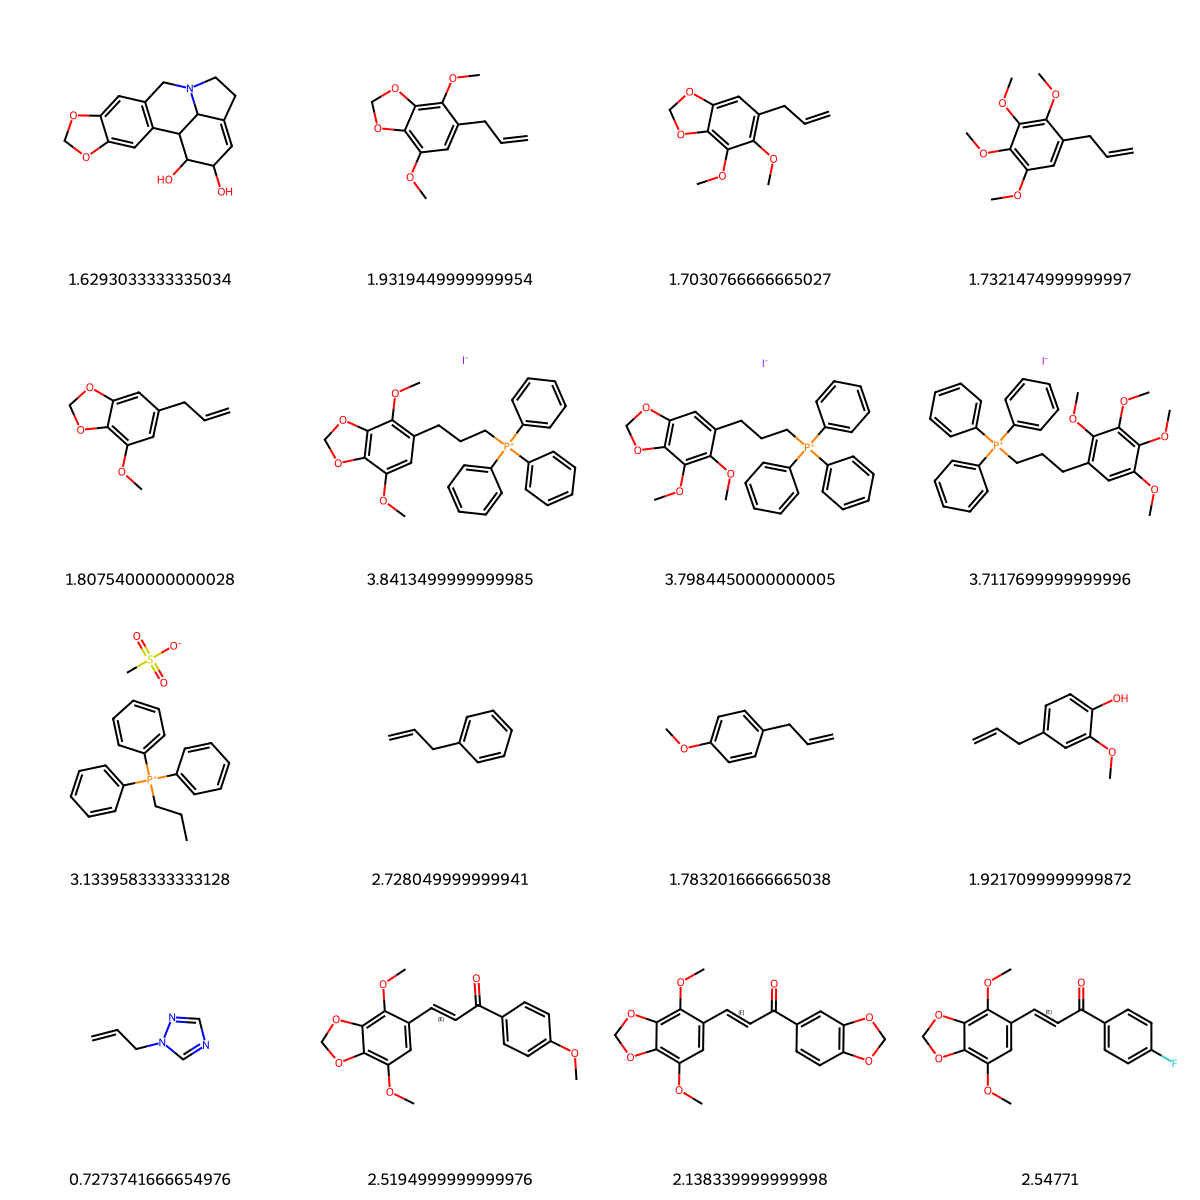

In [41]:
dm.to_image(mols=mols, legends=list(map(str, y_pred_paper)))

### для попова

In [45]:
df_train = pd.read_csv("logP-14000.csv").dropna()

smi = df_train.SMILES

list_smi_canon = []

for smiles in smi:
    mol = dm.to_mol(smiles)
    canon_smi = dm.to_smiles(mol, canonical=True)
    list_smi_canon.append(canon_smi)

df_train.insert(1, "canon_smi", list_smi_canon, False)  # добавили колонку

df_train.drop_duplicates(
    subset="canon_smi", keep="first", inplace=True
)  # удалили дубликаты, оставляя только первое входящее веществоP

y_train_2 = df_train.Kow

In [46]:
smiles_Popova = df_train.SMILES

mols_Popova = [dm.to_mol(smiles) for smiles in smiles_Popova]

fps_Popova = [
    dm.to_fp(mol, fp_type="ecfp-count", nBits=1024 * 4) for mol in mols_Popova
]

X_train_2 = pd.DataFrame(data=np.array(fps_Popova))  # сделаем не только с 0 и 1
X_train_2

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
rf_model_2 = ensemble.RandomForestRegressor(
    max_features="sqrt",
    n_estimators=2000,
    n_jobs=-1,
    random_state=42,
    min_samples_leaf=1,
    max_depth=300,
    min_samples_split=2,
)

In [48]:
cv_results_2 = model_selection.cross_validate(
    rf_model,
    X_train_2,
    y_train_2,
    scoring="r2",
    cv=kf,
    n_jobs=1,
    verbose=2,
    return_estimator=True,
    return_train_score=True,
)

[CV] END .................................................... total time=  25.7s
[CV] END .................................................... total time=  26.1s
[CV] END .................................................... total time=  25.7s
[CV] END .................................................... total time=  25.8s
[CV] END .................................................... total time=  25.7s


In [49]:
cv_results_df_2 = pd.DataFrame(cv_results_2).sort_values("test_score", ascending=False)
cv_results_df_2

,fit_time,score_time,estimator,test_score,train_score
2,25.332036,0.389416,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.850977,0.978397
0,25.194688,0.529657,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.849728,0.978258
4,25.392037,0.312544,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.842437,0.978598
1,25.394218,0.692752,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.834325,0.978501
3,25.409661,0.391376,"(DecisionTreeRegressor(max_depth=300, max_feat...",0.829248,0.978800


In [50]:
RF_model_LogP = cv_results_df_2.iloc[0, 2]

In [51]:
y_pred_M_count_2 = RF_model_LogP.predict(X_test)

In [52]:
metrics.r2_score(y_test, y_pred_M_count_2)

-1.5513857806515259

In [54]:
metrics.mean_squared_error(y_test, y_pred_M_count_2) ** 0.5

1.542338316057024

In [55]:
metrics.mean_absolute_error(y_test, y_pred_M_count_2)

1.316133509221311

In [56]:
y_pred_paper_2 = RF_model_LogP.predict(X_test_fps_16)

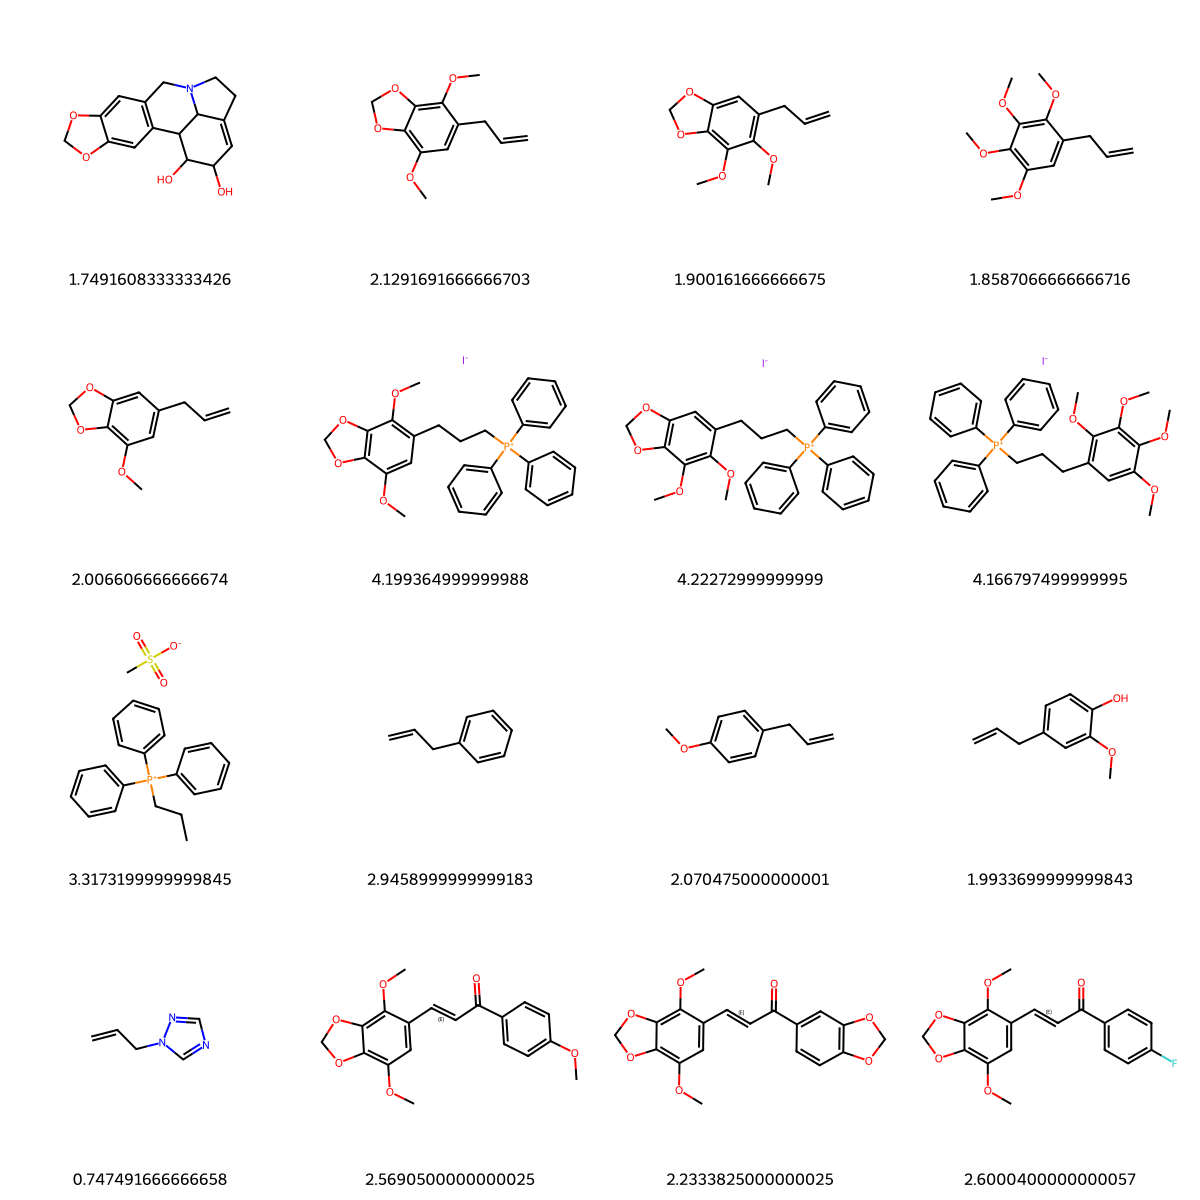

In [57]:
dm.to_image(mols=mols, legends=list(map(str, y_pred_paper_2)))